## Import Requirements

In [66]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy.stats import pearsonr
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
import pickle

## Import Data

In [67]:
data = pd.read_csv("Data/data.csv",encoding = "ISO-8859-1")

## Inspect Data

In [68]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [69]:
data.head()

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,3,1,1,2,700000.0,5,0,0,0,0,0,0,0,0,0
1,3,1,1,2,700000.0,5,0,0,0,0,0,0,0,0,0
2,3,1,1,2,650000.0,5,0,0,0,0,0,0,0,0,0
3,3,1,1,1,450000.0,5,0,0,0,0,0,0,0,0,0
4,3,3,3,4,800000.0,6,0,1,0,0,0,0,0,0,0


## Selecting features for the Base Model

In [70]:
columns = "location bed bath toilet price".split()

In [71]:
dataset = pd.DataFrame(data, columns = columns)

## Separating the Target and Features, and Splitting the to Train and Test Datasets

In [72]:
y=data.price
x=data.drop('price', axis=1)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)
#print (x_train, x_test)

## Run Linear Regression as the base model

In [74]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
pred_lm = lm.predict(x_test)

In [75]:
pred_lm[0:10]

array([ 899961.40275022,  557945.46731585,  347769.40923165,
       1150601.2198218 ,  235555.71185581, 1074382.7236537 ,
        368661.24984715,   82119.33278012,  634311.32629869,
        541950.0470603 ])

Text(0, 0.5, 'Predictions')

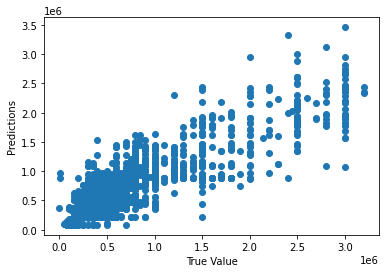

In [76]:
plt.scatter(y_test, pred_lm)
plt.xlabel('True Value')
plt.ylabel('Predictions')

In [77]:
print('Score:'), model.score(x_test, y_test)

Score:


(None, 0.7237636889521957)

In [78]:
score = sqrt(mean_squared_error(y_test,pred_lm))
print('mean_squared_error',score)

mean_squared_error 348273.367182145


## Selecting more features to improve the Base Model

In [79]:
columns = "location bed bath toilet price Property_Type	Parking_Space Security Electricity Furnished Security_Doors CCTV Pool Gym BQ".split()

In [80]:
dataset = pd.DataFrame(data, columns = columns)

In [81]:
dataset

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,3,1,1,2,700000.0,5,0,0,0,0,0,0,0,0,0
1,3,1,1,2,700000.0,5,0,0,0,0,0,0,0,0,0
2,3,1,1,2,650000.0,5,0,0,0,0,0,0,0,0,0
3,3,1,1,1,450000.0,5,0,0,0,0,0,0,0,0,0
4,3,3,3,4,800000.0,6,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,2,2,2,2,700000.0,5,1,0,0,0,0,0,0,0,0
5630,2,4,4,5,1700000.0,2,1,0,0,0,0,0,0,0,0
5631,2,4,4,5,2500000.0,6,1,0,0,0,0,0,0,0,0
5632,2,1,1,2,500000.0,5,0,0,0,0,0,0,0,0,0


## Separating the target and features Datasets

In [82]:
y = dataset.price
x = dataset.drop('price', axis=1)

### Modeling using Cross Validation

In [83]:
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=6, shuffle=True, random_state=10)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 4695, Test set:939
Fold:2, Train set: 4695, Test set:939
Fold:3, Train set: 4695, Test set:939
Fold:4, Train set: 4695, Test set:939
Fold:5, Train set: 4695, Test set:939
Fold:6, Train set: 4695, Test set:939


In [84]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [85]:
#max_depth = [1,2,3,4,5,6,7,8,9,10]

#for val in max_depth:
score = cross_val_score(tree.DecisionTreeRegressor(max_depth= 7, random_state= 10), x, y, cv= kf, scoring="neg_mean_squared_error")
print('For max depth: 7')
rmse(score.mean())

For max depth: 7
rmse= 308128.10


## RandomForest Model Tunning

In [86]:
#estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450]

#for count in estimators:
score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= 100, random_state=10, oob_score = True, max_features = "auto", min_samples_leaf = 10), x, y, cv= kf, scoring="neg_mean_squared_error")
print('For estimators: 100')
rmse(score.mean())

For estimators: 100
rmse= 294670.75


In [87]:
#Creating a pickle file for the Optimum model
with open('Data/model_pickle', 'wb') as file:
    pickle.dump(score, file)

In [88]:
with open('Data/model_pickle', 'rb') as file:
    score = pickle.load(file)
rmse(score.mean())
#score.predict(x)

rmse= 294670.75
